# Phys555 Assignment 2 Question 1
Karlee Zammit - V00823093

## Datasets, Data Mining, and Data Visualization (using PCA)

Q1- Find two 'suitable' and 'challenging' data sets; one for regression and another for a classification problem. Describe the two data sets in one notebook (inputs and targets) and explain how they can be used for regression and classification. Write about works/applications that have been previously done regarding the chosen data sets. Also, conduct data mining, such as feature visualization and present informative data, using PCA.

# Introduction 
Regression and classification are both predictive problems where past information is used to predict future observations. The goal of regression is to predict numerical values, and the goal of classification is predict categorical values. 

In this assignment, I present two different datasets - one for classification and one for regression. 

## Regression
As stated in Bishop, C. M. (2006), the goal of regression is to predict the value of one or more continuous target variables t given the value of a D-dimensional vector x of input variables. 

### Linear Regression

Below I provide a summary of linear regression as explained in Bishop, C. M. (2006):

Linear models form the basis for more sophisticated regression models. Linear models involve a linear combination of input variables

$y(x,w) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}$

where 

$x = (x_{1},....,x_{D})^{T}$. This is known as linear regression. 

A significant limitation of linear regression is that it only allows for a linear function of the input variables. 

For this assignment, the dataset I chose is based on a paper by Insley, S. (2017), which discusses seasonal patterns in ambient noise near Sachs Harbour, Northwest Territories. 

### K-Nearest Neighbours
The KNN regression algorithm has the ability to work well with non-linear relationships, because it uses nearest neighbours to predict future observations. It assumes that similar things exist in close proximity. In KNN, the distance between an existing data point and a query data point are calculated, and the distances are then sorted from smallest to largest. The first K entries are selected, and if a regression problem, the mean of the K labels is returned. 

## Classification
Classification is using one or more variables to predict a categorical variable of interest. I will discuss the basics of classification in the classification section below, using a dataset on mushrooms.


# Regression

I looked at many different datasets before settling on the Sachs Harbor dataset. The Sachs Harbor dataset looks at ambient noise conditions, weather variables such as temperature, dew point, and relative humidity, and ice concentrations at certain radii away from a recorder. The data was used in the paper to perform several regression tasks, which found: 
 
- Stronger wind increased noise 
- Greater ice concentrations decreased noise 

and stated an area of future work would be to model the impact of increased human activities on ambient noise levels, and predict the impact of these changing levels on marine mammals. 

*Before I settled on this dataset, I looked at:*

Szeged Weather data (analysis included in the appendix): https://www.kaggle.com/datasets/budincsevity/szeged-weather

Beans (analysis included in the appendix): http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Analysis for the two datasets above is included in the appendix as I did a lot of data mining that took a substantial amount of time. 

*Others that I chose to delete (reasons in brackets):*

CalCOFI Dataset: https://www.kaggle.com/datasets/sohier/calcofi?resource=download (too noisy, not enough samples, not enough complexity, ie. one principal component accounted for 90+% of the data)

Abalone: https://archive.ics.uci.edu/ml/datasets/abalone (not enough samples, not enough complexity, ie. one principal component accounted for 90+% of the data)



In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

## Sachs Harbor Dataset

(9982, 23)
564
(9642, 16)


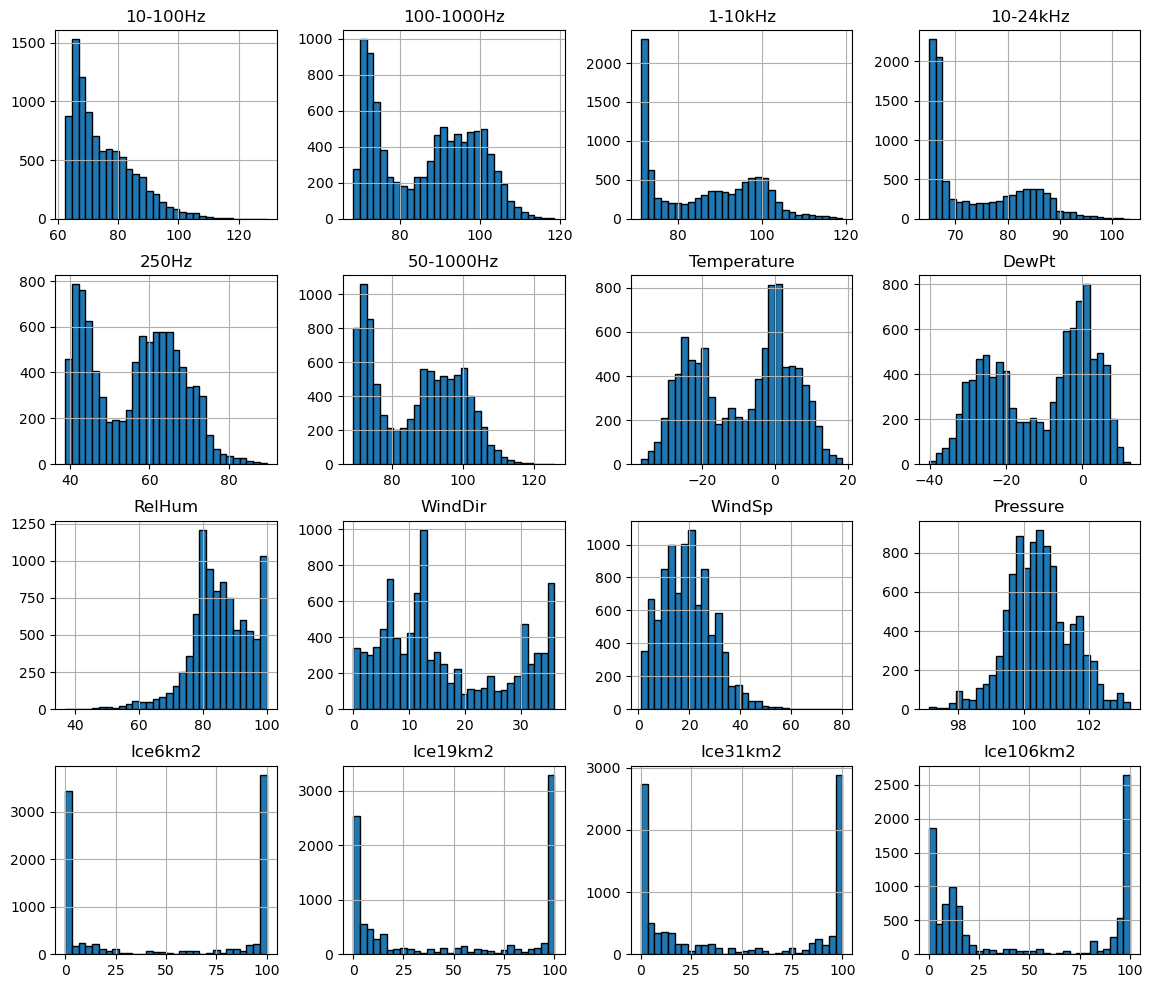

In [2]:
# Load in the data csv and print it's shape
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
print(df_SH.shape)

# Count the existing nans
nan_count = df_SH.isna().sum().sum()
print(nan_count)

# Drop non necessary columns 
df_SH = df_SH.drop(['Deployment', 'Year', 'Month', 'Day', 'Hour', 'DateTime', 'Ice'], axis=1)

# Double check there are no nans 
df_SH=df_SH.dropna(axis=0)

# Plot a histogram of the data
df_SH.hist(figsize=(14, 12), bins=30, edgecolor="black")
print(df_SH.shape)

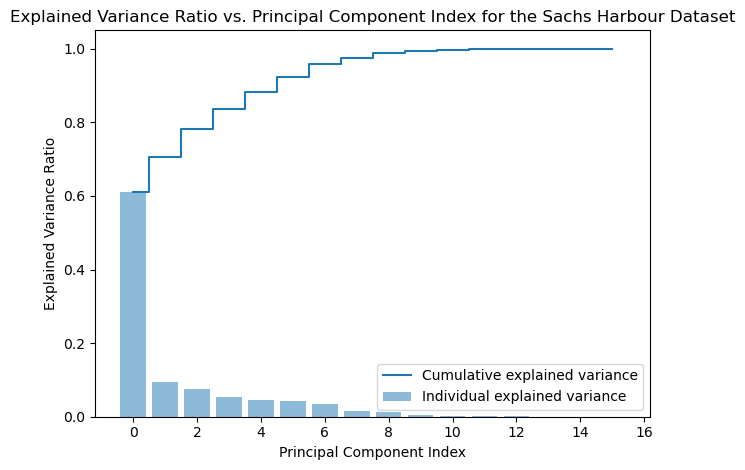

In [3]:
## Normalize the data

# Initialize the normalization estimator 
sc = StandardScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(df_SH)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(df_SH)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Sachs Harbour Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Approximately 60% of the information included in the data is contained within the first principal component. 16 principal components are needed to describe 100% of the information in the data.

Text(0.5, 1.0, 'Correlation Coefficient Matrix for Sachs Harbour Dataset')

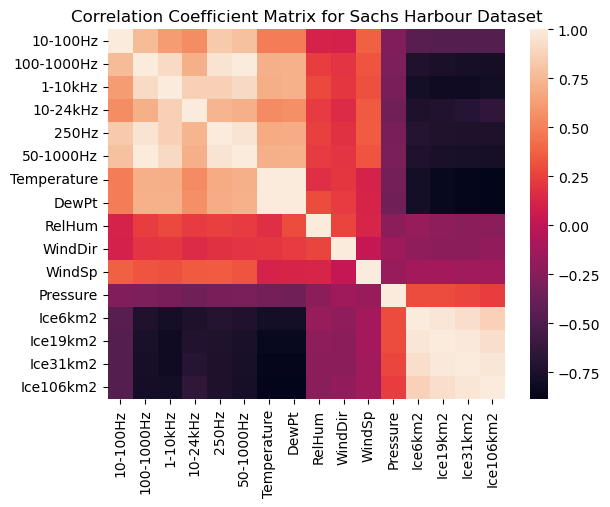

In [4]:
corr = df_SH.corr()
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
plt.title('Correlation Coefficient Matrix for Sachs Harbour Dataset')

Above is the correlation coefficient matrix for the dataset. Relative humidity, windspeed, and wind direction do not seem to be correlated with temperature, or the ambient frequency levels. Ice concentrations seems to be negatively correlated with the levels within specific ambient sound levels. For the purposes of this assignment, I will show the power of linear regression and KNN, using temperature as the target variable. I will discuss this further in question 2. 

# Classification Dataset

For this assignment, I decided to provide two different datasets for classification as they show different but important things to keep in mind for classification. 

For classification, I chose the UCI mushroom dataset: https://archive.ics.uci.edu/ml/datasets/mushroom

and the Houston Weather dataset: https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data

Overall, for classification, the output of an algorithm is a category, a value between 0 and 1 which represents a probability, or a binary value, that represents a predicted value for a given example of input data. This output can be used to understand what label an example input datapoint should be given based on a trained classification algorithm. 

## Mushrooms

Below is data visualization for the mushroom data. For classification, the output for a given input example would be a binary classification of "edible" or "poisonous". The mushroom dataset has been widely used, and is a popular dataset from the UCI website. There are 10+ papers that cite it, ranging a wide variety of topics such as feature extraction, noise filtering, and categorical clustering. 

Link to dataset: https://archive.ics.uci.edu/ml/datasets/mushroom

In [5]:
# Load in data and clean 
df_mushies = pd.read_csv('secondary_data.csv', delimiter=';')
print(df_mushies.shape)
nan_count = df_mushies.isna().sum().sum()
print(nan_count)
print(df_mushies.shape)
df_mushies = df_mushies.dropna(axis=1, how='any')
nan_count = df_mushies.isna().sum().sum()
print(nan_count)
print(df_mushies.shape)

(61069, 21)
307463
(61069, 21)
0
(61069, 12)


In [6]:
# This data is categorical 
df_mushies = df_mushies.astype('category')
print(df_mushies)

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_mushies.columns:
    df_mushies[column] = labelencoder.fit_transform(df_mushies[column])

df_mushies.head()

      class cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
0         p        15.26         x         o                    f          w   
1         p        16.60         x         o                    f          w   
2         p        14.07         x         o                    f          w   
3         p        14.17         f         e                    f          w   
4         p        14.64         x         o                    f          w   
...     ...          ...       ...       ...                  ...        ...   
61064     p         1.18         s         y                    f          f   
61065     p         1.27         f         y                    f          f   
61066     p         1.27         s         y                    f          f   
61067     p         1.24         f         y                    f          f   
61068     p         1.17         s         y                    f          f   

      stem-height stem-width stem-color

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,1,1481,6,6,0,10,1577,1656,11,1,0,3
1,1,1614,6,6,0,10,1681,1766,11,1,0,2
2,1,1362,6,6,0,10,1662,1721,11,1,0,3
3,1,1372,2,1,0,10,1463,1545,11,1,0,3
4,1,1419,6,6,0,10,1537,1667,11,1,0,3


Text(0.5, 1.0, 'Correlation Coefficient Matrix for Mushroom Dataset')

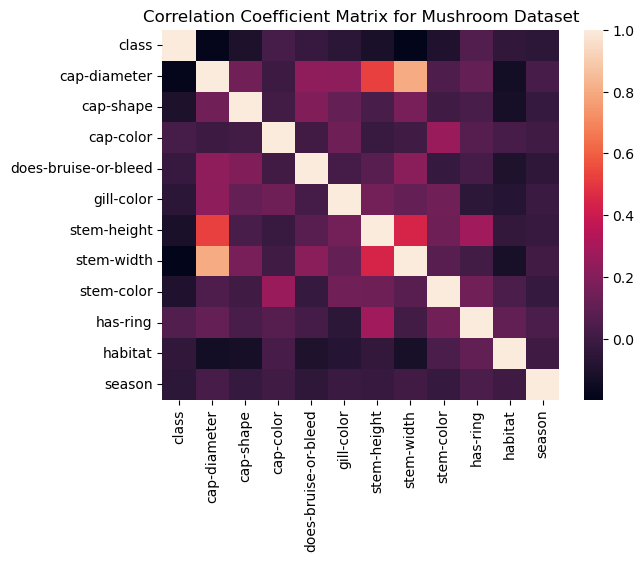

In [7]:
# Plot correlation matrix for the mushroom data 
corr = df_mushies.corr()
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
plt.title('Correlation Coefficient Matrix for Mushroom Dataset')

## Houston Weather (Classification)

Below is data visualization for the Houston weather dataset. The classification output would be a binary classification of "rain" or "no rain" for a given input example. I decided to include this, as it is a very good example of unbalanced data: there are many more non-rainy days than rainy days, and so before this data is used for classification, it will need to be balanced through a exercise such as bootstrapping.

(365, 16)
(365, 16)
(365, 16)
(366, 16)
(730, 16)
(3651, 16)
(3651, 16)
Index(['date', 'min_temp', 'max_temp', 'rainfall', 'wind_speed9am',
       'wind_speed3pm', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm',
       'rain_today', 'rain_tomorrow'],
      dtype='object')
           date  min_temp  max_temp  rainfall wind_speed9am wind_speed3pm  \
0    2006-01-01      64.0      81.0       0.0           8.0          14.0   
1    2006-01-02      57.0      79.0       0.0           9.0          10.0   
2    2006-01-03      49.0      79.0       0.0           0.0          10.0   
3    2006-01-04      52.0      76.0       0.0           7.0           7.0   
4    2006-01-05      51.0      69.0       0.0          16.0          23.0   
..          ...       ...       ...       ...           ...           ...   
360  2021-12-27      68.0      81.0       0.0           5.0          16.0   
361  2021-12-28      72.0      84.0       0.0 

Index(['min_temp', 'max_temp', 'rainfall', 'wind_speed9am', 'wind_speed3pm',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am',
       'temp3pm'],
      dtype='object')

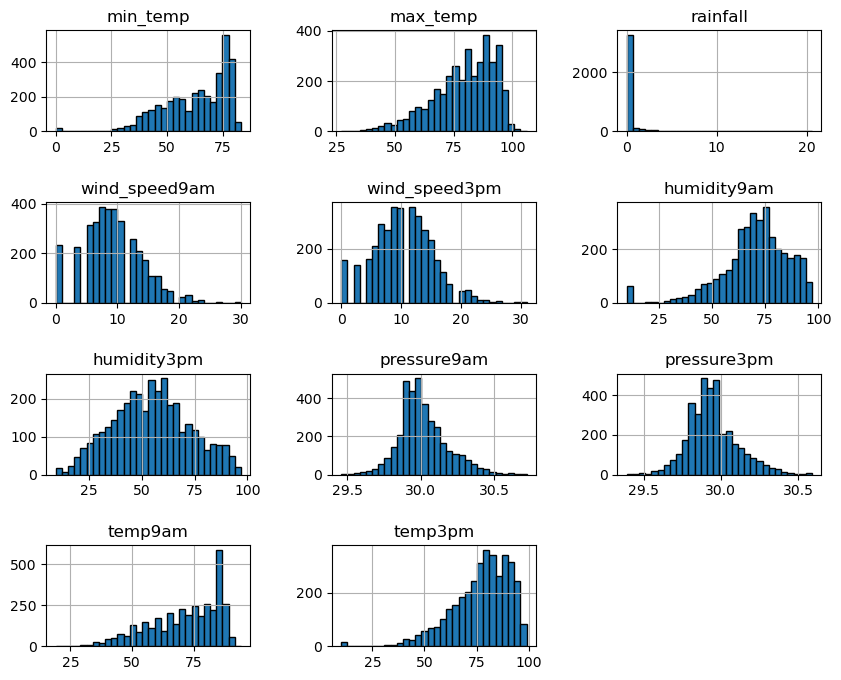

In [8]:
# Load in csv data
htx_2006 = pd.read_csv('htx_2006_weather.csv')
print(htx_2006.shape)
htx_2010 = pd.read_csv('htx_2010_weather.csv')
print(htx_2010.shape)
htx_2011 = pd.read_csv('htx_2011_weather.csv')
print(htx_2011.shape)
htx_2012 = pd.read_csv('htx_2012_weather.csv')
print(htx_2012.shape)
htx_2013 = pd.read_csv('htx_2013_weather.csv')
htx_2014 = pd.read_csv('htx_2014_weather.csv')
htx_2015 = pd.read_csv('htx_2015_weather.csv')
htx_2018 = pd.read_csv('htx_2018_weather.csv')
htx_2019 = pd.read_csv('htx_2019_weather.csv')
htx_2021 = pd.read_csv('htx_2021_weather.csv')

# Append the first two together
htx = htx_2006.append(htx_2010)
print(htx.shape)

# Make a list of the rest of the years 
years = [htx_2011, htx_2012, htx_2013, htx_2014, htx_2015, htx_2018, htx_2019, htx_2021]

# Loop through all of the years and append them 
for year in years: 
    htx = htx.append(year)
    
print(htx.shape)

# Drop nans from the data by row
htx=htx.dropna(axis=0)
print(htx.shape)
print(htx.columns)

#htx.hist(figsize=(10, 8), bins=30, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)

print(htx)

# Determine columns that are not numeric 
result = htx.applymap(np.isreal)

# Replace 'Blank's with nans
htx = htx.replace('Blank', np.nan)

# And then remove the rows containing these nans
htx=htx.dropna(axis=0)
print(htx.shape)

# Change strings to floats where applicable
htx['wind_speed9am'] = pd.to_numeric(htx['wind_speed9am'])
htx['wind_speed3pm'] = pd.to_numeric(htx['wind_speed3pm'])
htx['humidity9am'] = pd.to_numeric(htx['humidity9am'])
htx['humidity3pm'] = pd.to_numeric(htx['humidity3pm'])
htx['pressure9am'] = pd.to_numeric(htx['pressure9am'])
htx['pressure3pm'] = pd.to_numeric(htx['pressure3pm'])
htx['temp9am'] = pd.to_numeric(htx['temp9am'])
htx['temp3pm'] = pd.to_numeric(htx['temp3pm'])

# Plot a histogram of the data
htx.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Drop non-numeric columns
htx = htx.drop(['date', 'cloud9am', 'cloud3pm', 'rain_today', 'rain_tomorrow'], axis=1)
htx.columns

     min_temp  max_temp  rainfall  wind_speed9am  wind_speed3pm  humidity9am  \
0        64.0      81.0       0.0            8.0           14.0         90.0   
1        57.0      79.0       0.0            9.0           10.0         87.0   
2        49.0      79.0       0.0            0.0           10.0         60.0   
3        52.0      76.0       0.0            7.0            7.0         87.0   
4        51.0      69.0       0.0           16.0           23.0         42.0   
..        ...       ...       ...            ...            ...          ...   
360      68.0      81.0       0.0            5.0           16.0         87.0   
361      72.0      84.0       0.0           14.0           15.0         74.0   
362      72.0      84.0       0.0            9.0           12.0         85.0   
363      67.0      83.0       0.0            8.0            9.0         84.0   
364      73.0      85.0       0.0           10.0           17.0         87.0   

     humidity3pm  pressure9am  pressure

<AxesSubplot:>

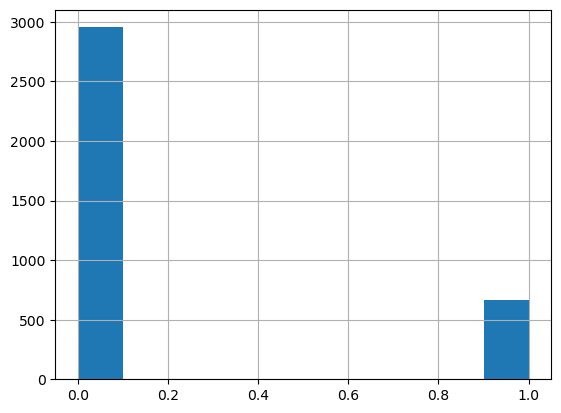

In [9]:
# Create a new column called "rain", and set to 1 if the rainfall
# was larger than 0, and 0 if it did not ran. 
htx.loc[htx['rainfall'] > 0.0, 'rain'] = 1
htx.loc[htx['rainfall'] <= 0.0, 'rain'] = 0
print(htx)

# See how many days it rained on 
sum(htx['rain'])

# Plot a histogram of the rainy vs non-rainy day to see if the data 
# is balanced
htx['rain'].hist()

As seen in the above plot, the data is not balanced, meaning there are far fewer rainy days not rainy days. Because of this, when splitting this data into training and testing, it will be thoroughly trained on how to predict not rainy days, but it will perform worse at predicting rainy days. Before classification can be completed, the data should be balanced with a technique such as bootstrapping. 

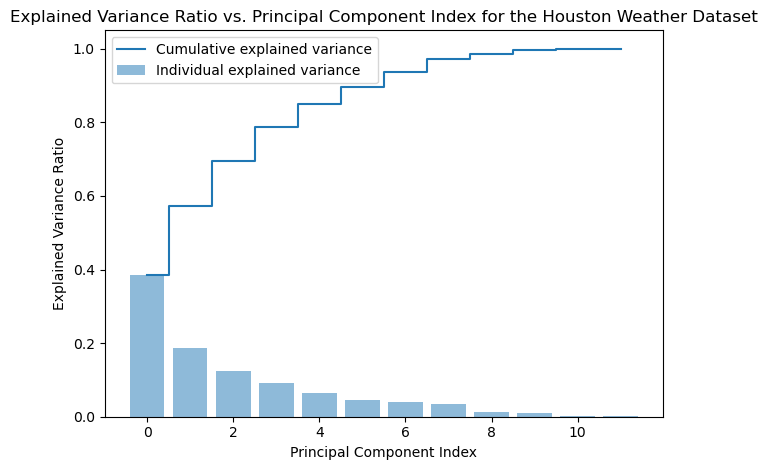

In [10]:
# Perform PCA analysis
sc = StandardScaler()

# Train the estimator on the input data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(htx)

# Apply the method to the data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(htx)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Houston Weather Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above PCA analysis, 11 principal components are needed to describe 100% of the information in the data. The first principal component can describe approximately 40% of the data, the second approximately 20% of the data, the third less than 20% of the data, etc. 

Text(0.5, 1.0, 'Correlation Coefficient Matrix for Houston Dataset')

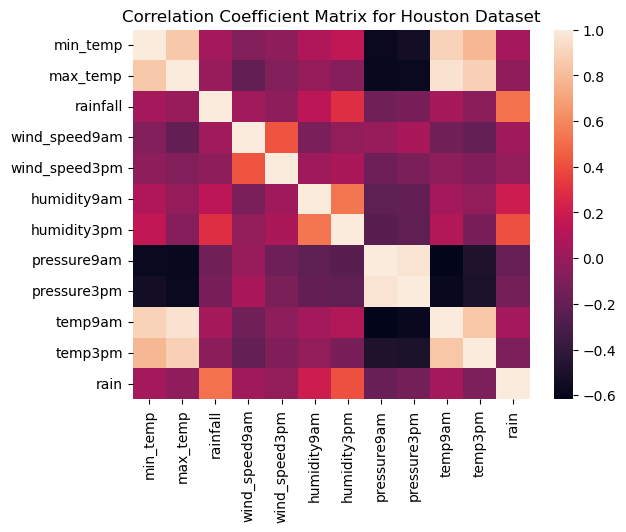

In [11]:
corr = htx.corr()
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
plt.title('Correlation Coefficient Matrix for Houston Dataset')

# Conclusion 

For this assignment, I will be using the: 

- Regression: Sachs Harbour Dataset 

- Classification: Explained using the UCI Mushroom Dataset
- Houston Weather Dataset included for classification as an example of unbalanced data 

# References



Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

**Datasets:**

Insley, S. J., Halliday, W. D., & de Jong, T. (2017). Seasonal Patterns in Ocean Ambient Noise near Sachs Harbour, Northwest Territories. Arctic, 70(3), 239–248. https://doi.org/10.14430/arctic4662

https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data

**Appendix Datasets:**
https://www.kaggle.com/datasets/budincsevity/szeged-weather

http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

**Datasets I Tried but Deleted:**

https://calcofi.com/ (too noisy)

https://www.kaggle.com/datasets/sohier/calcofi?resource=download (too noisy)

Abalone: https://archive.ics.uci.edu/ml/datasets/abalone (not enough samples, not enough complexity, ie. one principal component accounted for 90+% of the data)


https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

# Appendix: Extra Datasets

## Szeged Weather (Regression)

(96453, 12)
517
(95936, 12)
Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')
(95936, 6)


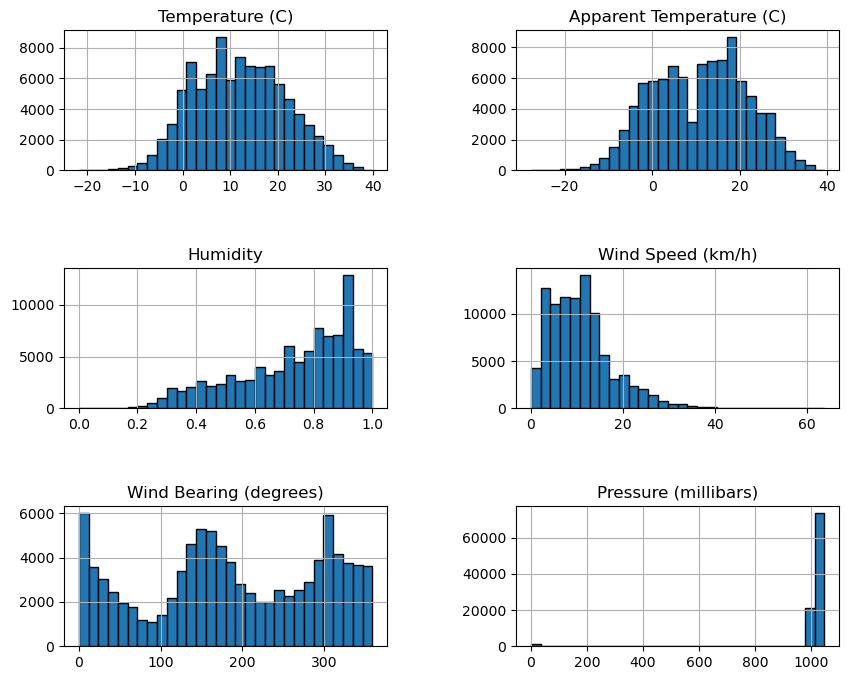

In [12]:
# Read the weather data csv and print the shape
weather = pd.read_csv(r'weatherHistory.csv', delimiter=',')
print(weather.shape)

# Count nans that exist in the data, and drop rows containing nans
nan_count = weather.isna().sum().sum()
print(nan_count)
weather=weather.dropna(axis=0)

# Print the shape of the data after rows containing nans were removed
print(weather.shape)
print(weather.columns)

# Drop non-numerical rows for the purposes of this analysis
weather = weather.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Precip Type', 'Loud Cover', 'Visibility (km)'], axis=1)
print(weather.columns)
print(weather.shape)

# Plot histograms of the data
weather.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


The pressure and humidity histograms look like they'll need some further data mining. Pressure of 0 millibars is impossible on Earth, and so these values must correspond to instrument error. Humidity of 0 means that there is no water vapour in the air, and it is known that water vapour is always present in the air, even if only in trace amounts. I will remove rows of data corresponding to 0 millibars and rows corresponding to 0 humidity. 

In [13]:
# Create a new dataframe with only rows corresponding to zero pressure
zero_press_df = weather.loc[ weather['Pressure (millibars)'] == 0]
# Print how many rows of 0 pressure there are
#print(zero_press_df)
print(zero_press_df.shape)

# Plot a histogram of 0 pressure data
#zero_press_df.hist(figsize=(10, 8), bins=30, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Remove 0 pressure from the data, and ensure this was done correctly
# by calculating the difference in sizes before and after removal
weather_mined = weather.loc[weather['Pressure (millibars)'] != 0]
print(weather.shape)
print(weather_mined.shape)
difference = weather.shape[0] -  weather_mined.shape[0]
print(difference)

(1288, 6)
(95936, 6)
(94648, 6)
1288


(22, 6)
(94626, 6)
1310


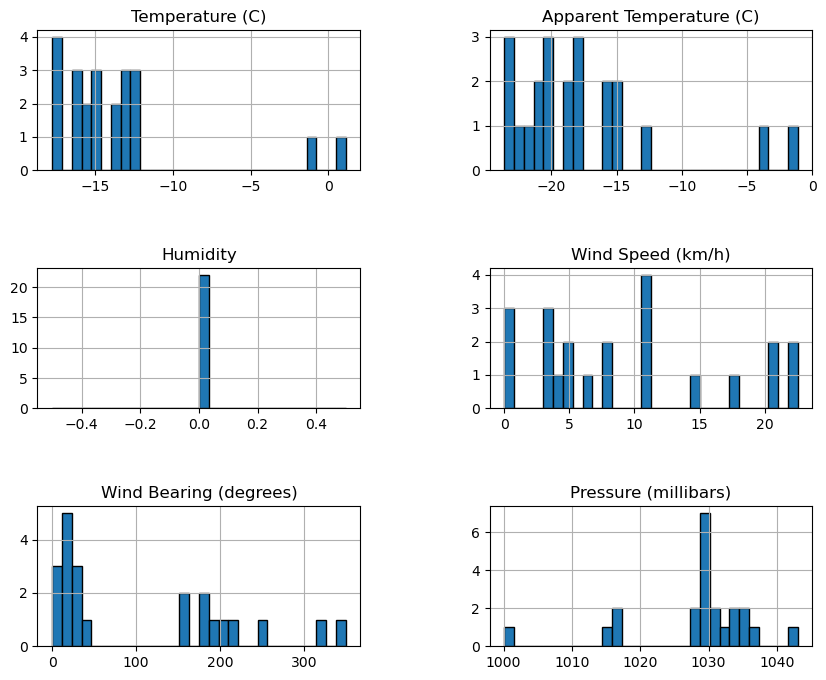

In [14]:
# Investigate zero humidity data
zero_humid_df = weather_mined.loc[weather_mined['Humidity'] == 0]
print(zero_humid_df.shape)

# Plot histograms of this data
zero_humid_df.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# As was done with pressure, remove rows corresponding to 0 humidity
weather_mined = weather_mined.loc[weather_mined['Humidity'] != 0]
print(weather_mined.shape)
difference = weather.shape[0] -  weather_mined.shape[0]
print(difference) # Diff from original is 1310, which is 1288 + 22 = 1310 so this checks out 

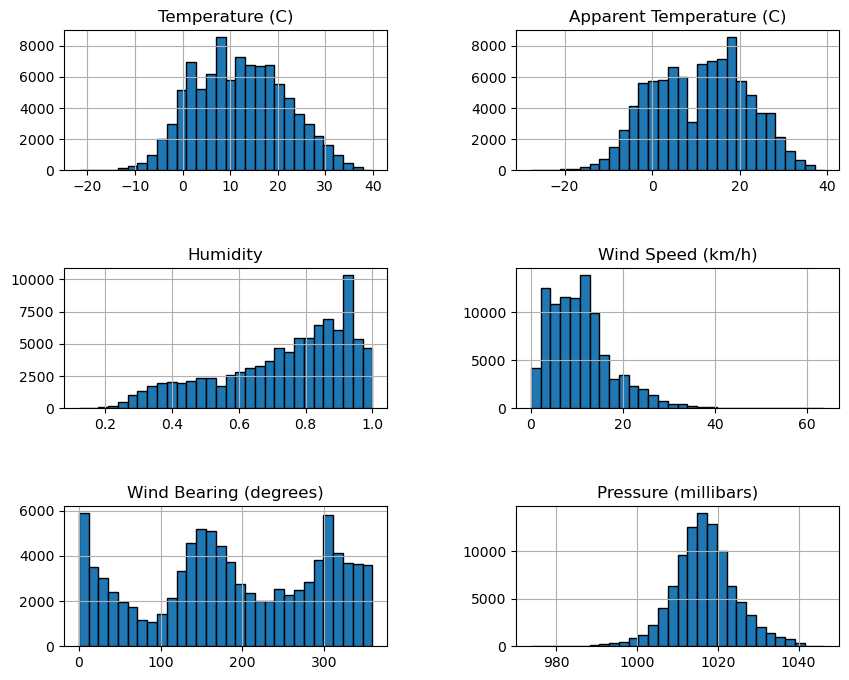

In [15]:
# Let's plot the mined data once more to see if anything was missed 
weather_mined.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# This looks a lot nicer!

Although I have performed some data mining, it is still likely that there are outliers, or noise, in this data that I was not able to determine from the rules applied above. This is important to be kept in mind as this noise can affect the prediction of future observations from this known data. This will be discussed further in question 2.

I will now perform principal component analysis to show the complexity of the data, and how many components are needed to describe the data.

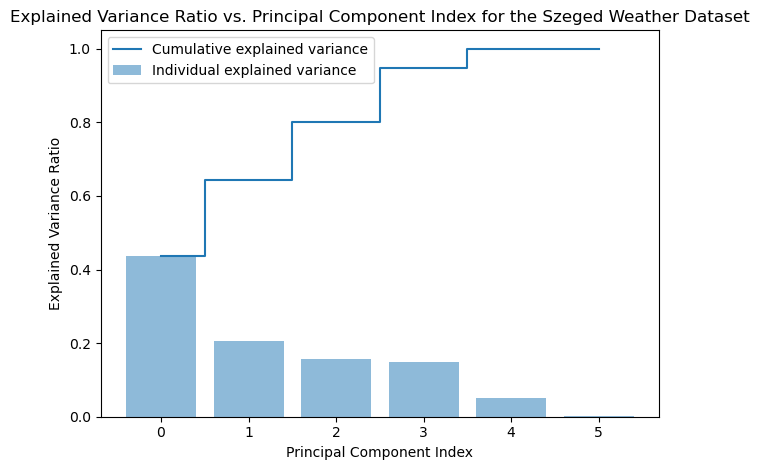

In [16]:
## Normalize the data

# Initialize the normalization estimator 
sc = StandardScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(weather_mined)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(weather_mined)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Szeged Weather Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above PCA analysis, 5 principal components are needed to describe 100% of the information in the data. The first principal component can describe approximately 43% of the data, the second approximately 38% of the data, the third less than 20% of the data, etc. 

I concluded that this dataset provided an appropriate level of complexity and number of components for the purposes of this assignment. 

## Beans (Regression)

In [17]:
# Read the weather data csv and print the shape
beans = pd.read_excel(r'Dry_Bean_Dataset.xlsx')

# Count nans that exist in the data, and drop rows containing nans
nan_count = beans.isna().sum().sum()
print(nan_count)

0


0
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


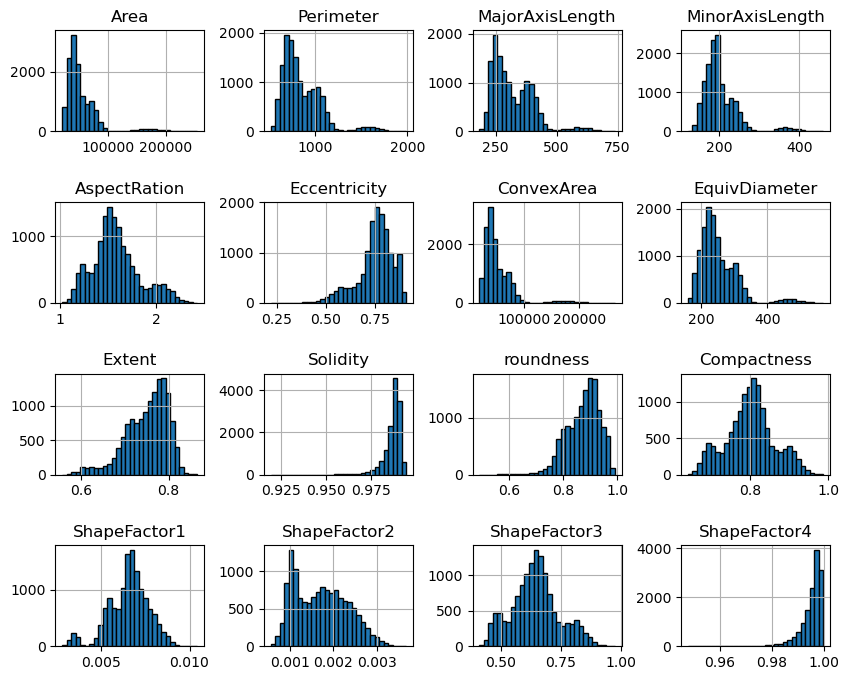

In [18]:
nan_count = beans.isna().sum().sum()
print(nan_count)

beans.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

print(beans.columns)

beans = beans.drop(['Class'], axis=1)

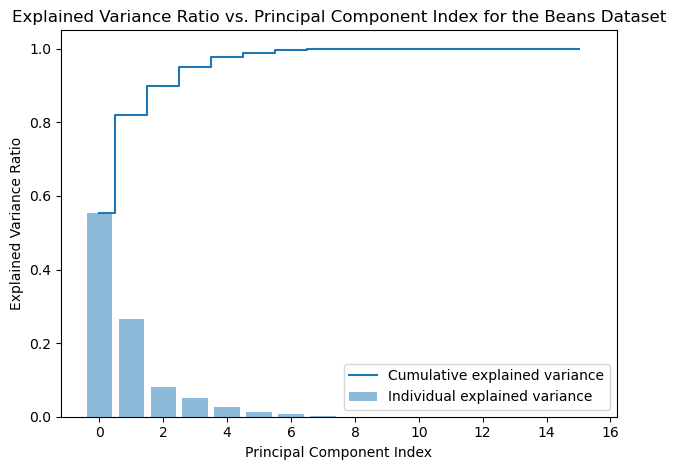

In [19]:
## Normalize the data

# Initialize the normalization estimator 
sc = StandardScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(beans)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(beans)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Beans Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()